In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()


In [6]:
#Query the table for data
hprecip_df = pd.read_sql("SELECT * FROM measurement", conn)
hprecip_df['date'] =hprecip_df['date'].astype(dtype = 'datetime64')
hprecip_df.head()

# reflect an existing database into a new model
# Base = automap_base()
# Base.prepare(engine, reflect = True)
# reflect the tables

id      station       date  prcp  tobs
0   1  USC00519397 2010-01-01  0.08  65.0
1   2  USC00519397 2010-01-02  0.00  63.0
2   3  USC00519397 2010-01-03  0.00  74.0
3   4  USC00519397 2010-01-04  0.00  76.0
4   5  USC00519397 2010-01-06   NaN  73.0

In [9]:
# We can view all of the classes that automap found
station_list = pd.DataFrame(hprecip_df['station'].unique())
station_list

0
0  USC00519397
1  USC00513117
2  USC00514830
3  USC00517948
4  USC00518838
5  USC00519523
6  USC00519281
7  USC00511918
8  USC00516128

In [ ]:
# Save references to each table


In [ ]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

query = '''

SELECT 
      prcp
      ,date
      ,tobs
FROM  
      measurement
WHERE 
      date BETWEEN "2016-08-23" AND "2017-08-23" 
        
'''


lyprecip_df = pd.read_sql(query, conn)
lyprecip_df.head(15)

prcp        date  tobs
0   0.00  2016-08-23  81.0
1   0.08  2016-08-24  79.0
2   0.08  2016-08-25  80.0
3   0.00  2016-08-26  79.0
4   0.00  2016-08-27  77.0
5   0.01  2016-08-28  78.0
6   0.00  2016-08-29  78.0
7   0.00  2016-08-30  79.0
8   0.13  2016-08-31  80.0
9   0.00  2016-09-01  81.0
10  0.00  2016-09-02  80.0
11  0.00  2016-09-03  79.0
12  0.03  2016-09-04  75.0
13   NaN  2016-09-05  79.0
14   NaN  2016-09-06  76.0

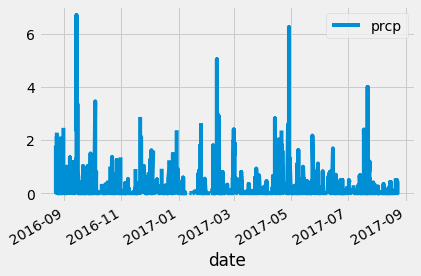

In [11]:
lyprecip_df['date'] = lyprecip_df['date'].astype(dtype = 'datetime64') 


lyprecip_df = lyprecip_df.sort_values('date',ascending=True)

lyprecip_df.plot(x='date', y='prcp')
plt.show()

In [12]:
# Calculate the date 1 year ago from the last data point in the database

ld = hprecip_df['date'].max()
lastdate = ld - np.timedelta64(365,'D')

lastdate
              

Timestamp('2016-08-23 00:00:00')

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
lyprecip_df.set_index('date')

# Sort the dataframe by date

lyprecip_df.sort_values('date',ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data

prcp       date  tobs
0     0.00 2016-08-23  81.0
1009   NaN 2016-08-23  80.0
1529  1.79 2016-08-23  77.0
704   0.05 2016-08-23  80.0
361   0.15 2016-08-23  76.0
...    ...        ...   ...
1527  0.00 2017-08-22  82.0
1528  0.08 2017-08-23  82.0
1008  0.00 2017-08-23  82.0
360   0.00 2017-08-23  81.0
2229  0.45 2017-08-23  76.0

[2230 rows x 3 columns]

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
lyprecip_df.describe()


prcp         tobs
count  2021.000000  2230.000000
mean      0.177279    74.590583
std       0.461190     4.611667
min       0.000000    58.000000
25%       0.000000    72.000000
50%       0.020000    75.000000
75%       0.130000    78.000000
max       6.700000    87.000000

In [15]:
# Design a query to show how many stations are available in this dataset?
station_list

0
0  USC00519397
1  USC00513117
2  USC00514830
3  USC00517948
4  USC00518838
5  USC00519523
6  USC00519281
7  USC00511918
8  USC00516128

In [16]:
Station_count = len(station_list)
Station_count

9

In [34]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = hprecip_df.groupby(hprecip_df['station']).count()
station_activity.sort_values(by = ['id'], ascending = False)



id  date  prcp  tobs
station                            
USC00519281  2772  2772  2772  2772
USC00519397  2724  2724  2685  2724
USC00513117  2709  2709  2696  2709
USC00519523  2669  2669  2572  2669
USC00516128  2612  2612  2484  2612
USC00514830  2202  2202  1937  2202
USC00511918  1979  1979  1932  1979
USC00517948  1372  1372   683  1372
USC00518838   511   511   342   511

In [25]:
station_list = station_activity.reset_index
station_list

<bound method DataFrame.reset_index of                id  date  prcp  tobs
station                            
USC00511918  1979  1979  1932  1979
USC00513117  2709  2709  2696  2709
USC00514830  2202  2202  1937  2202
USC00516128  2612  2612  2484  2612
USC00517948  1372  1372   683  1372
USC00518838   511   511   342   511
USC00519281  2772  2772  2772  2772
USC00519397  2724  2724  2685  2724
USC00519523  2669  2669  2572  2669>

In [37]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

Most_active = hprecip_df.loc[(hprecip_df['station'] == 'USC00519281') & 
                              (hprecip_df['date'] > '2016-08-23')]

Most_active.head(10)

id      station       date  prcp  tobs
14608  14609  USC00519281 2016-08-24  2.15  77.0
14609  14610  USC00519281 2016-08-25  0.06  80.0
14610  14611  USC00519281 2016-08-26  0.01  80.0
14611  14612  USC00519281 2016-08-27  0.12  75.0
14612  14613  USC00519281 2016-08-28  0.60  73.0
14613  14614  USC00519281 2016-08-29  0.35  78.0
14614  14615  USC00519281 2016-08-30  0.00  77.0
14615  14616  USC00519281 2016-08-31  0.24  78.0
14616  14617  USC00519281 2016-09-01  0.02  80.0
14617  14618  USC00519281 2016-09-02  0.01  80.0

In [39]:
High_temp = Most_active['tobs'].max()
Low_temp = Most_active['tobs'].min()
Avg_temp = Most_active['tobs'].mean()

Temp_dict = {"High Temp": High_temp, "Low Temp": Low_temp, "Averge Temp" : Avg_temp}
Temp_dict

{'High Temp': 83.0, 'Low Temp': 59.0, 'Averge Temp': 73.0968660968661}

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram





## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
